# Data Structures and basic search in Python

* [Stack](#chapter1)
    * [Depth-First Search (Stack)](#section_1_1)
    * [DFS networkX](#section_1_2)
    * [Python LifoQueue (~ Stack)](#section_1_3)
* [Deque](#chapter2)
    * [Breadth-First Search (Deque)](#section_2_1)
* [Priority Queue](#chapter3)
* [Heap](#chapter4)
    * [Heapsort vs Quicksort](#section_3_1)
    * [Binary Search Trees](#section_3_2)
    * [Dijkstra Algorithm](#section_3_3)
* [Summary](#chapter5)

<font color=blue >[Python Big O Notation] (https://wiki.python.org/moin/TimeComplexity)</font> 

# Stack <a class="anchor" id="chapter1"></a>

- stack is a linear data structure that follows the principle of Last In First Out (LIFO) (last element inserted inside the stack is removed first)

- example implementation of stack using classes: https://www.tutorialspoint.com/python_data_structure/python_stack.htm

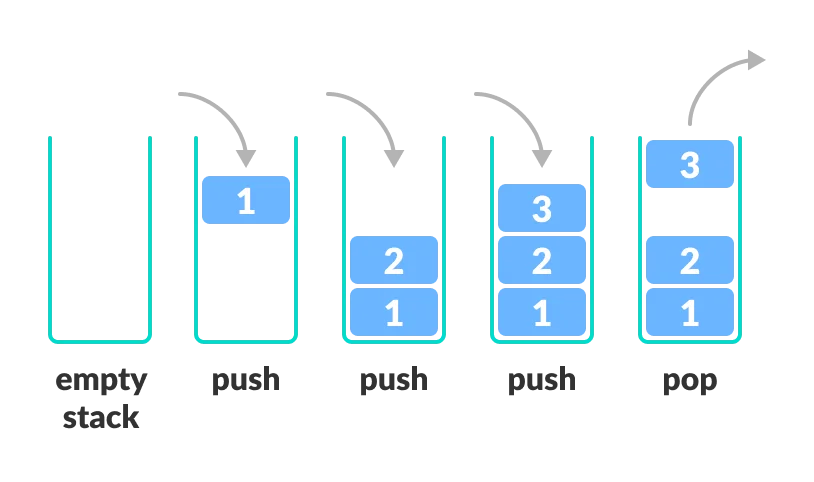

In [1]:
stack = ['Akbar','Alice','Amar', 'Anthony', 'Ben', 'Cedric', 'Luna','Richard']
stack

['Akbar', 'Alice', 'Amar', 'Anthony', 'Ben', 'Cedric', 'Luna', 'Richard']

In [2]:
stack.pop() # O(1)
stack

['Akbar', 'Alice', 'Amar', 'Anthony', 'Ben', 'Cedric', 'Luna']

In [3]:
stack.pop(-2) # ~ O(2)
stack

['Akbar', 'Alice', 'Amar', 'Anthony', 'Ben', 'Luna']

In [4]:
stack.append('Iris') # O(1)
stack

['Akbar', 'Alice', 'Amar', 'Anthony', 'Ben', 'Luna', 'Iris']

In [5]:
stack.append('Iris') # O(1)
stack

['Akbar', 'Alice', 'Amar', 'Anthony', 'Ben', 'Luna', 'Iris', 'Iris']

In [6]:
stack.pop(0) # O(n)
stack

['Alice', 'Amar', 'Anthony', 'Ben', 'Luna', 'Iris', 'Iris']

- all the elements in the list are physically moved one position to the left # O(n)
- up to here basically a list 
- Python documentation: https://docs.python.org/3/tutorial/datastructures.html

Why use a stack?
- Stacks are simple data structures that allow us to store and retrieve data sequentially
- Stacks make excellent mechanisms for temporary storage of information within procedures 
  (they allow recursive invocations of procedures without risk of 
   destroying data from previous invocations of the routine)

Applications of stack:
- Back/Forward stacks on browsers (https://cse.buffalo.edu/~shapiro/Courses/CSE116/notes10.html)
- allowing users to backtrack their actions until the beginning of the session 
- temporary storage of information within procedures

## Depth-First Search (Stack) <a class="anchor" id="section_1_1"></a>

![DFSUrl](https://www3.cs.stonybrook.edu/~skiena/combinatorica/animations/anim/dfs.gif "DFS")

In [7]:
graph_dict = {'A': (['B', 'C']),
         'B': (['A', 'D', 'E']),
         'C': (['A', 'F']),
         'D': (['B']),
         'E': (['B', 'F']),
         'F': (['C', 'E'])}

In [8]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

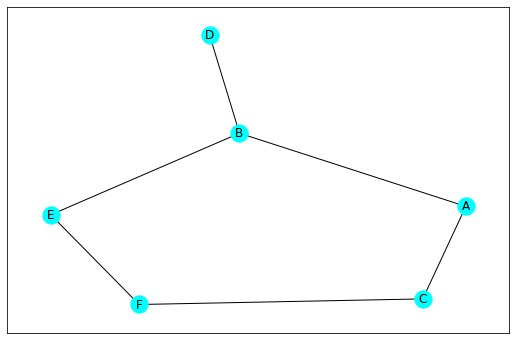

In [9]:
gd1 = nx.from_dict_of_lists(graph_dict)
plt.figure(3,figsize=(9,6)) 
nx.draw_networkx(gd1, with_labels=True, node_color='cyan', node_size=300)
plt.show()

In [10]:
def dfs(graph, initial):
    explored, stack = list(), [initial]  # stack == frontier
    while stack:
        state = stack.pop()
        if state not in explored:
            explored.append(state)
            stack.extend([neighbor for neighbor in graph[state]
                          if not ((neighbor in stack) or (neighbor in explored))])
    return explored

In [11]:
print("A DFS traversal starting from 'A': {}".format(dfs(graph_dict, 'A')))
print("A DFS traversal starting from 'E': {}".format(dfs(graph_dict, 'E')))

A DFS traversal starting from 'A': ['A', 'C', 'F', 'E', 'B', 'D']
A DFS traversal starting from 'E': ['E', 'F', 'C', 'A', 'B', 'D']


## DFS networkX <a class="anchor" id="section_1_2"></a>

In [12]:
romania_graph = {'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
               'Bucharest': ['Urziceni', 'Pitesti', 'Giurgiu', 'Fagaras'],
               'Craiova': ['Drobeta', 'Rimnicu', 'Pitesti'],
               'Drobeta': ['Craiova', 'Mehadia'],
               'Eforie': ['Hirsova'],
               'Fagaras': ['Bucharest', 'Sibiu'],
               'Giurgiu': ['Bucharest'],
               'Hirsova': ['Eforie', 'Urziceni'],
               'Iasi': ['Vaslui', 'Neamt'],
               'Lugoj': ['Timisoara', 'Mehadia'],
               'Mehadia': ['Drobeta', 'Lugoj'],
               'Neamt': ['Iasi'],
               'Oradea': ['Zerind', 'Sibiu'],
               'Pitesti': ['Bucharest', 'Craiova', 'Rimnicu'],
               'Rimnicu': ['Craiova', 'Pitesti', 'Sibiu'],
               'Sibiu': ['Arad', 'Fagaras', 'Oradea', 'Rimnicu'],
               'Timisoara': ['Arad', 'Lugoj'],
               'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
               'Vaslui': ['Iasi', 'Urziceni'],
               'Zerind': ['Arad', 'Oradea']}

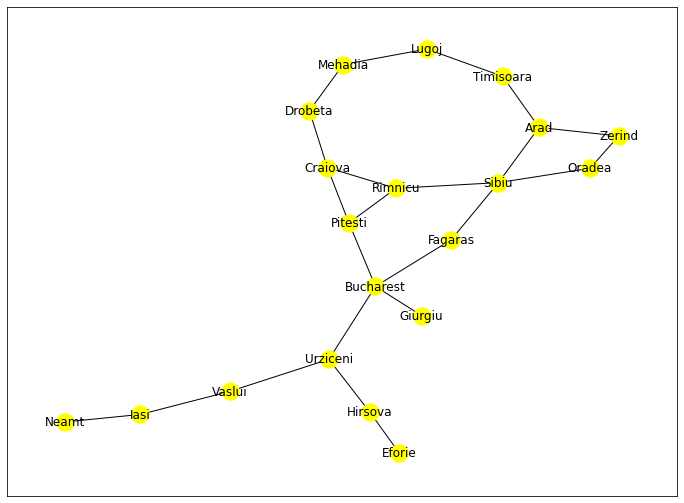

In [13]:
R = nx.from_dict_of_lists(romania_graph)
plt.figure(3,figsize=(12,9)) 
nx.draw_networkx(R, with_labels=True, node_color='yellow', node_size=300)
plt.show()

In [14]:
list(nx.dfs_edges(R, source='Sibiu', depth_limit=3))

[('Sibiu', 'Arad'),
 ('Arad', 'Zerind'),
 ('Zerind', 'Oradea'),
 ('Arad', 'Timisoara'),
 ('Timisoara', 'Lugoj'),
 ('Sibiu', 'Fagaras'),
 ('Fagaras', 'Bucharest'),
 ('Bucharest', 'Urziceni'),
 ('Bucharest', 'Pitesti'),
 ('Bucharest', 'Giurgiu'),
 ('Sibiu', 'Rimnicu'),
 ('Rimnicu', 'Craiova'),
 ('Craiova', 'Drobeta')]

## Python LifoQueue (~ Stack) <a class="anchor" id="section_1_3"></a>

In [15]:
from queue import LifoQueue

- ...thread-safe LIFO Data structure 
- ...stack operation that are sequential
- ...more than one thread accesses it

Useful Links:
https://www.baeldung.com/java-lifo-thread-safe
https://docs.python.org/3/library/queue.html

Many time - related operation, e.g. :

- Queue.get(block=True, timeout=None)
Remove and return an item from the queue. If optional args block is true and timeout is None (the default), block if necessary until an item is available.

- Queue.task_done()
Indicate that a formerly enqueued task is complete.

(more) applications:
- Undo: Maintaining changes to an object so that they can be undone or reversed in the order they were applied
- Depth-First: Maintaining a list of nodes when navigating a tree or graph in a depth-first manner
- Parsers: Maintain a list of expressions in the order they must be executed
- Backtracking: Maintain a list of options in the order they were encountered or made available, in case the current option fails
- Freshness: Maintain a list of connections or data in the reverse order they were used so the most recent can be acquired when needed

--> Conclusion:
- <font color=blue > stack-based processing of data is a common building block in many algorithms used in computer science, such as depth-first search, branch and bound, and many more</font>

In [16]:
# created a size limited queue
lifo_queue = LifoQueue(maxsize=1)

In [17]:
# add an item to the queue
lifo_queue.put("Cedric", block=True, timeout=None) #choose to not block when adding items by setting the “block” argument to False.

In [18]:
lifo_queue.full()

True

In [19]:
lifo_queue.qsize()

1

In [20]:
# get an item from the queue
item = lifo_queue.get(block=True, timeout=0)
item

'Cedric'

In [21]:
lifo_queue.qsize()

0

In [22]:
# check if the queue has space
if not lifo_queue.full():
    # add an item to the queue
    lifo_queue.put_nowait('Adam')

In [23]:
lifo_queue.qsize()

1

- sample implementation in python: https://www.geeksforgeeks.org/stack-in-python/

## Deque <a class="anchor" id="chapter2"></a>

A double-ended queue (or "doubly linked list), or deque, has the feature of adding and removing elements from either end

Useful links:
https://www.tutorialspoint.com/python/python_deque.htm
https://docs.python.org/3/library/collections.html

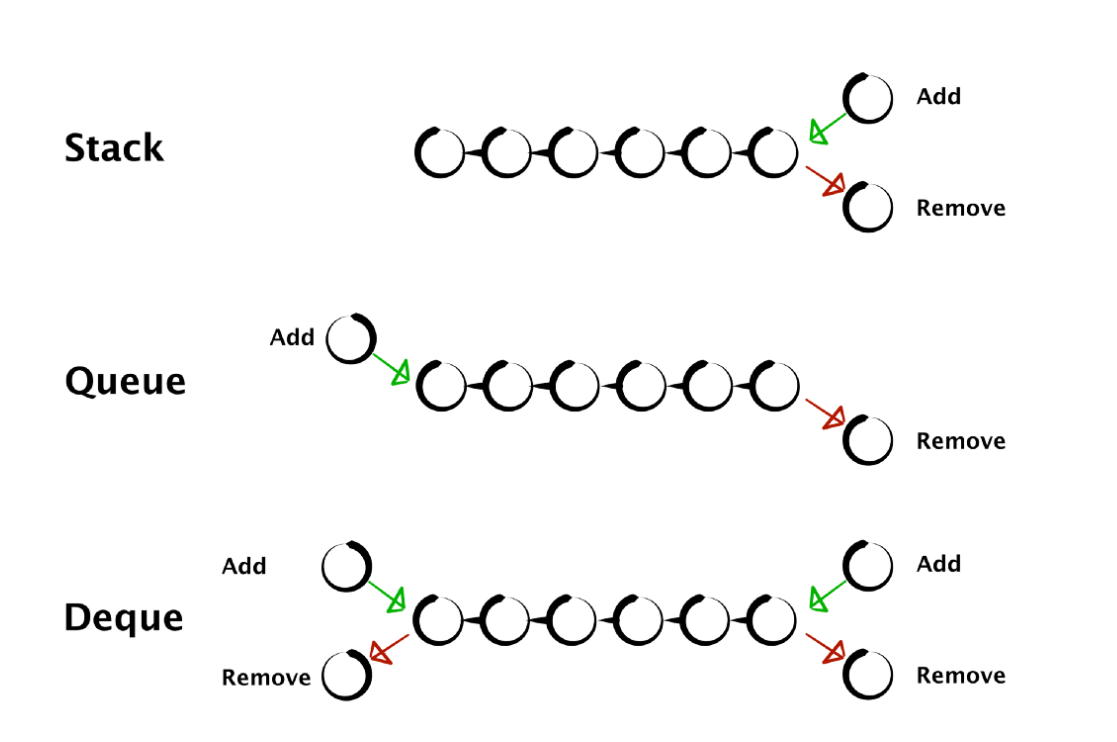

In [24]:
from collections import deque

In [25]:
deque1 = deque(['Alice','Amar', 'Akbar', 'Anthony', 'Ben', 'Cedric', 'Lisa','Richard'])

In [26]:
deque1.popleft() # 0(1)

'Alice'

In [27]:
deque1

deque(['Amar', 'Akbar', 'Anthony', 'Ben', 'Cedric', 'Lisa', 'Richard'])

In [28]:
deque1.rotate(3) # O(k)
deque1

deque(['Cedric', 'Lisa', 'Richard', 'Amar', 'Akbar', 'Anthony', 'Ben'])

Sample applications / useful links:

- https://www.geeksforgeeks.org/deque-set-1-introduction-applications/
- Given an array and an integer K, find the maximum for each and every contiguous subarray of size K.
  https://www.geeksforgeeks.org/sliding-window-maximum-maximum-of-all-subarrays-of-size-k/
- 0-1 BFS (Breadth-First Search) similiar to Dijkstra, later
- scheduling problems https://en.wikipedia.org/wiki/Round-robin_scheduling
- thread stealing algorithm https://en.wikipedia.org/wiki/Double-ended_queue#Applications   

Conclusion:
- Deque similiar to FifoQueue (but "import Queue" more for sequential operations)        

## Breadth-First Search (Deque) <a class="anchor" id="section_2_1"></a>

![BFSUrl](https://www3.cs.stonybrook.edu/~skiena/combinatorica/animations/anim/bfs.gif "BFS")

In [30]:
def bfs(graph, initial):
    explored, deque0 = list(), [initial]  # deque == frontier
    deque1=deque(deque0)
#     print(type(deque1))
    while deque1:
        state = deque1.popleft()
        if state not in explored:
            explored.append(state)
            deque1.extend([neighbor for neighbor in graph[state]
                          if not ((neighbor in deque1) or (neighbor in explored))])
    return explored

In [31]:
print("A BFS traversal starting from 'A': {}".format(bfs(graph_dict, 'A')))
print("A BFS traversal starting from 'E': {}".format(bfs(graph_dict, 'E')))

A BFS traversal starting from 'A': ['A', 'B', 'C', 'D', 'E', 'F']
A BFS traversal starting from 'E': ['E', 'B', 'F', 'A', 'D', 'C']


In [32]:
list(nx.bfs_edges(R, source='Sibiu', depth_limit=3))

[('Sibiu', 'Arad'),
 ('Sibiu', 'Fagaras'),
 ('Sibiu', 'Oradea'),
 ('Sibiu', 'Rimnicu'),
 ('Arad', 'Zerind'),
 ('Arad', 'Timisoara'),
 ('Fagaras', 'Bucharest'),
 ('Rimnicu', 'Craiova'),
 ('Rimnicu', 'Pitesti'),
 ('Timisoara', 'Lugoj'),
 ('Bucharest', 'Urziceni'),
 ('Bucharest', 'Giurgiu'),
 ('Craiova', 'Drobeta')]

# Priority Queue <a class="anchor" id="chapter3"></a>

A priority queue sorts and dequeues elements based on their priorities.

https://www.educative.io/answers/what-is-the-python-priority-queue

A sorting mechanism is required every time a new element is enqueued (internally using a heap, next), O(logn)

https://docs.python.org/3/library/queue.html

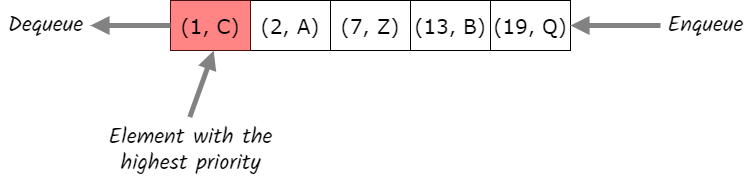

In [33]:
from queue import PriorityQueue

q = PriorityQueue()

q.put(4)
q.put(2)
q.put(5)
q.put(1)
q.put(3)

while not q.empty():
    next_item = q.get()
    print(next_item)

1
2
3
4
5


Applications:
- Dijkstra algorithm (shortest distance)
- A* search algorithm
- scheduling problems
- extract largest/smallest element (more on heaps)
- load balancing

https://www.geeksforgeeks.org/applications-priority-queue/

# HEAP <a class="anchor" id="chapter4"></a>

- Heap is a special tree structure in which each parent node is less than or equal to its child node. Then it is called a Min Heap
- If each parent node is greater than or equal to its child node then it is called a max heap
- useful with implementing priority queues where the queue item with higher weightage is given more priority in processing

https://www.tutorialspoint.com/python_data_structure/python_heaps.htm

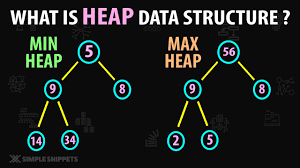

In [34]:
import heapq

H = [21,1,45,78,3,5]
# Use heapify to rearrange the elements
heapq.heapify(H)
print(H)

[1, 3, 5, 78, 21, 45]


<font color=blue >[Heap visualization] (https://www.cs.usfca.edu/~galles/visualization/Heap.html)</font> 

In [35]:
# Remove element from the heap
heapq.heappop(H)

1

In [36]:
H

[3, 21, 5, 78, 45]

In [37]:
# Replace an element
heapq.heapreplace(H,6)

3

In [38]:
H

[5, 21, 6, 78, 45]

In [39]:
# Push item on the heap, then pop and return the smallest item from the heap
heapq.heappushpop(H, 49)

5

In [40]:
H

[6, 21, 49, 78, 45]

In [41]:
heapq.nlargest(3, H)

[78, 49, 45]

Heap use cases:
 - same as priority queue (algorithms, scheduling, ..)
 - Building heap takes O(n) time complexity, whereas building Sorted Array takes O(n * log n)
 - other operations similiar order statistics benefit (insert, delete, find min even O(1) or constant time)
 - https://docs.python.org/3/library/heapq.html

## Heapsort vs Quicksort <a class="anchor" id="section_3_1"></a>

In [42]:
def heapsort(iterable):
    h = []
    for value in iterable:
         heapq.heappush(h, value)
    return [heapq.heappop(h) for i in range(len(h))]
heapsort([1, 13, 5, 70, 9, 2, 4, 46, 8, 110])

Wall time: 0 ns


[1, 2, 4, 5, 8, 9, 13, 46, 70, 110]

- https://stackabuse.com/quicksort-in-python/ - divide and conquer
- heapsort worst case (O(n*logn)) much better than quicksort worst case (O(n * n))
- https://stackabuse.com/heap-sort-in-python/

In [44]:
import random
import numpy as np
import time
import pandas as pd

In [45]:
numbers = [random.randint(1,1000) for x in range(100000)]

In [46]:
%%time
numbers_np=np.array(numbers)
indices=numbers_np.argsort()[-10:]
numbers_np[indices]

Wall time: 13 ms


array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [47]:
%%time
heapq.nlargest(10,numbers)

Wall time: 7.96 ms


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [48]:
time_dict={}
algo=['quicksort', 'mergesort', 'heapsort']
for i in algo:
    start = time.time()
    np.sort(numbers, kind=i)[:10]    
    stop = time.time()
    duration = stop-start
    time_dict[i]= duration
time_pd=pd.DataFrame(time_dict, index=['time'])
print(time_pd)

      quicksort  mergesort  heapsort
time   0.023251   0.019995  0.019242


- https://numpy.org/doc/stable/reference/generated/numpy.sort.html
- Merge Sort is another Divide and Conquer algorithm
- https://stackoverflow.com/questions/10337533/a-fast-way-to-find-the-largest-n-elements-in-an-numpy-array

# Binary Search Trees <a class="anchor" id="section_3_2"></a>

- The left subtree of a node contains only nodes with keys lesser than the node’s key
- The right subtree of a node contains only nodes with keys greater than the node’s key
- The left and right subtree each must also be a binary search tree
- There must be no duplicate nodes

Sample implementations:

- https://blog.boot.dev/computer-science/binary-search-tree-in-python/
- https://www.tutorialspoint.com/python_data_structure/python_binary_search_tree.htm (search)

Performance:  
- insert,  search, delete: average O(logn), worst case (O(n)) 
- balanced binary search tree (BST) worst case: O(n)
- BST = height between bottom leaves not differ by more than 1    

What is difference between binary heap and binary search tree?

- Duplication in binary heaps is allowed because nodes <= root
- heaps are complete BST (except for last level all levels are filled)
- heaps can be created in linear time O(n) while the BST takes O (N * log ( N ) ) to build

https://www.codingninjas.com/codestudio/library/why-binary-heap-is-better-than-binary-search-tree-bst-for-priority-queues

# Dijkstra Algorithm  <a class="anchor" id="section_3_3"></a>

- weighted edges ~ cost function

- start at vertex $A$ in a graph and traverse an efficient path (as measured by summing edge weights) to terminate at some different vertex $B$

Process:

1. Create *unvisited set* of all nodes

2. Set distance from $A$ to $0$ for the initial/current node and to $+\infty$ for all other nodes.
<a id="dijkstra-3"></a>

3. For the current node, calculate all distances from $A$ to unvisited neighbours; compare, select smallest distance (Relaxation)

4. Remove all considered nodes from unvisited set (don't check these again) 

5. Set node with (new) smallest tentative distance as "current node", go back to step 3

(from [Wikipedia Commons](https://commons.wikimedia.org/wiki/Main_Page)) 

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif" />
    </center>

- another explanation: https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

In [50]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    print("d:",d)
    print("Start:",start)
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        print("D:",D,"P:", P)
        return True

In [51]:
graph_dij = {'a': {'b': 3, 'd': 1},
     'b': {'a': 3, 'c': 2},
     'c': {'b': 2, 'f': 5},
     'd': {'a': 1, 'e': 8, 'f': 12},
     'e': {'d': 8, 'f': 4},
     'f': {'c': 5, 'd': 12, 'e': 4}}

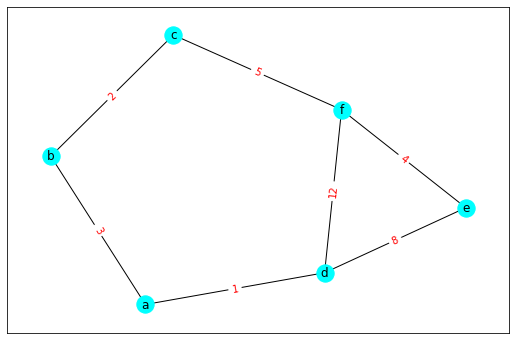

In [52]:
# Dij = nx.from_dict_of_lists(graph_dij)
edges = [['a', 'b'],['a','d'], ['b', 'c'],['c','f'], ['d', 'a'],['d','e'],['d','f'],['e','f'],['f','c']]
Dij = nx.Graph()
Dij.add_edges_from(edges)
pos = nx.spring_layout(Dij)
plt.figure(3,figsize=(9,6)) 
nx.draw_networkx(Dij, pos, with_labels=True, node_color='cyan', node_size=300)
nx.draw_networkx_edge_labels(
    Dij, pos,
    edge_labels={('a','b'):3,('a','d'):1,('c','b'):2,('c','f'):5,('e','d'):8,('e','f'):4,('f','c'):5,('d','f'):12},
    font_color='red')
plt.show()

In [53]:
def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessors (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D={start:0}
    P={}
    Q=[(0,start)]
    S=set()
    return D, P, Q, S

In [54]:
def dijkstra(graph, start):
    '''
    This function implements Dijkstra's algorithm on a graph,
    determining shortest distances from start to all vertices
    in the graph.
    INPUT:
    graph: dict of dicts to represent weighted graph
    start: starting vertex
    OUTPUT:
    D : dict of distances of each vertex to start
    P : dict of predecessors (for paths back to start) 
    Example:
    G = {'a': {'b': 3, 'd': 1},
         'b': {'a': 3, 'c': 2},
         'c': {'b': 2, 'f': 5},
         'd': {'a': 1, 'e': 8, 'f': 12},
         'e': {'d': 8, 'f': 4},
         'f': {'c': 5, 'd': 12, 'e': 4}}
    dijkstra(G, 'a') ====> (D, P) where
      ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
       {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
    '''
    D, P, Q, S = setup_dijkstra(start)
    while Q:                              # Unprocessed nodes?
        _, u = heapq.heappop(Q)                   # Get closest node
        if u in S: continue                 # If visited skip
        S.add(u)                            # Visit otherwise
        for v in graph[u]:                  # Examine neighbors
            relax_dijkstra(graph, u, v, D, P) # Relax edges
      ### INSERT MISSING LINE HERE
            heapq.heappush(Q,(D[v],v))
    return D,  P


In [58]:
dijkstra(graph_dij, 'a')
#d Shortcut estimate
#D: dict of dicts keeping track of distances
#P: predecessor dictionary to track shortest path trees

d: 3
Start: a
D: {'a': 0, 'b': 3} P: {'b': 'a'}
d: 1
Start: a
D: {'a': 0, 'b': 3, 'd': 1} P: {'b': 'a', 'd': 'a'}
d: 2
Start: d
d: 9
Start: d
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9} P: {'b': 'a', 'd': 'a', 'e': 'd'}
d: 13
Start: d
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 13} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'd'}
d: 6
Start: b
d: 5
Start: b
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 13, 'c': 5} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'd', 'c': 'b'}
d: 7
Start: c
d: 10
Start: c
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 10, 'c': 5} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'c', 'c': 'b'}
d: 17
Start: e
d: 13
Start: e
d: 15
Start: f
d: 22
Start: f
d: 14
Start: f


({'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 10, 'c': 5},
 {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'c', 'c': 'b'})

In [59]:
print(nx.shortest_path(R, source='Urziceni', target='Mehadia'))

['Urziceni', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia']


# Summary <a class="anchor" id="chapter5"></a>

- what stacks, queues and heaps are
- data structures can be important for performance
- where data structures are used (applications: BFS, DFS, Dijkstra)
- how this is done in python

In [60]:
# A* search

# - *heuristic function* $h$: 
#     - helps in choosing the node progression 
#     - eliminates some of the work that Dijkstra's algorithm requires

# -  focus on the goal state of the traversal and trim the amount of routes considered

# <center>
#     <img src = 'https://upload.wikimedia.org/wikipedia/commons/5/5d/Astar_progress_animation.gif'/>
# </center>